In [1]:
# !gdown --folder 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4 -O data -q

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# libraries
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-deep')
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['figure.dpi'] = 100

# Data Inspection

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/datasets/Jamboree.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
# remove unnecessary columns
df.drop(columns=['Serial No.'], inplace=True, errors='ignore')

# remove trailing space with lower case feature name
df.columns = [s.strip().lower() for s in df.columns]

print(f'Shape of data is {df.shape}')

Shape of data is (500, 8)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre score          500 non-null    int64  
 1   toefl score        500 non-null    int64  
 2   university rating  500 non-null    int64  
 3   sop                500 non-null    float64
 4   lor                500 non-null    float64
 5   cgpa               500 non-null    float64
 6   research           500 non-null    int64  
 7   chance of admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# descriptive analysis
df.describe(percentiles=[0.1, 0.75, 0.9])

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
10%,300.000000,99.000000,2.000000,2.000000,2.00000,7.809000,0.000000,0.53000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
90%,331.000000,116.000000,5.000000,4.500000,4.55000,9.362000,1.000000,0.92000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# skewness and kurtosis analysis
from scipy.stats import skew, kurtosis

skew_kurtosis_df = pd.DataFrame({
    'feature': df.columns,
    'skewness': [skew(df[col], bias=True) for col in df.columns],
    'kurtosis': [kurtosis(df[col], bias=True, fisher=True) for col in df.columns]
})

high_skew_threshold = 1
high_kurtosis_threshold = 3

def highlight_skew_kurtosis(val, skew_col, kurt_col):
  if skew_col and (val > high_skew_threshold or val < -high_skew_threshold):
    return 'background-color: yellow; color: black'
  elif kurt_col and (val > high_kurtosis_threshold):
    return 'background-color: orange; color: black'
  return ''

styled_skew_kurtosis_df = skew_kurtosis_df.style.map(
    lambda val: highlight_skew_kurtosis(val, True, False), subset=['skewness']
).map(
    lambda val: highlight_skew_kurtosis(val, False, True), subset=['kurtosis']
)

styled_skew_kurtosis_df

,feature,skewness,kurtosis
0,gre score,-0.039722,-0.715950
1,toefl score,0.095314,-0.658707
2,university rating,0.090024,-0.813978
3,sop,-0.228285,-0.710656
4,lor,-0.144854,-0.750288
5,cgpa,-0.026533,-0.567657
6,research,-0.241747,-1.941558
7,chance of admit,-0.289096,-0.462124


# Visualization

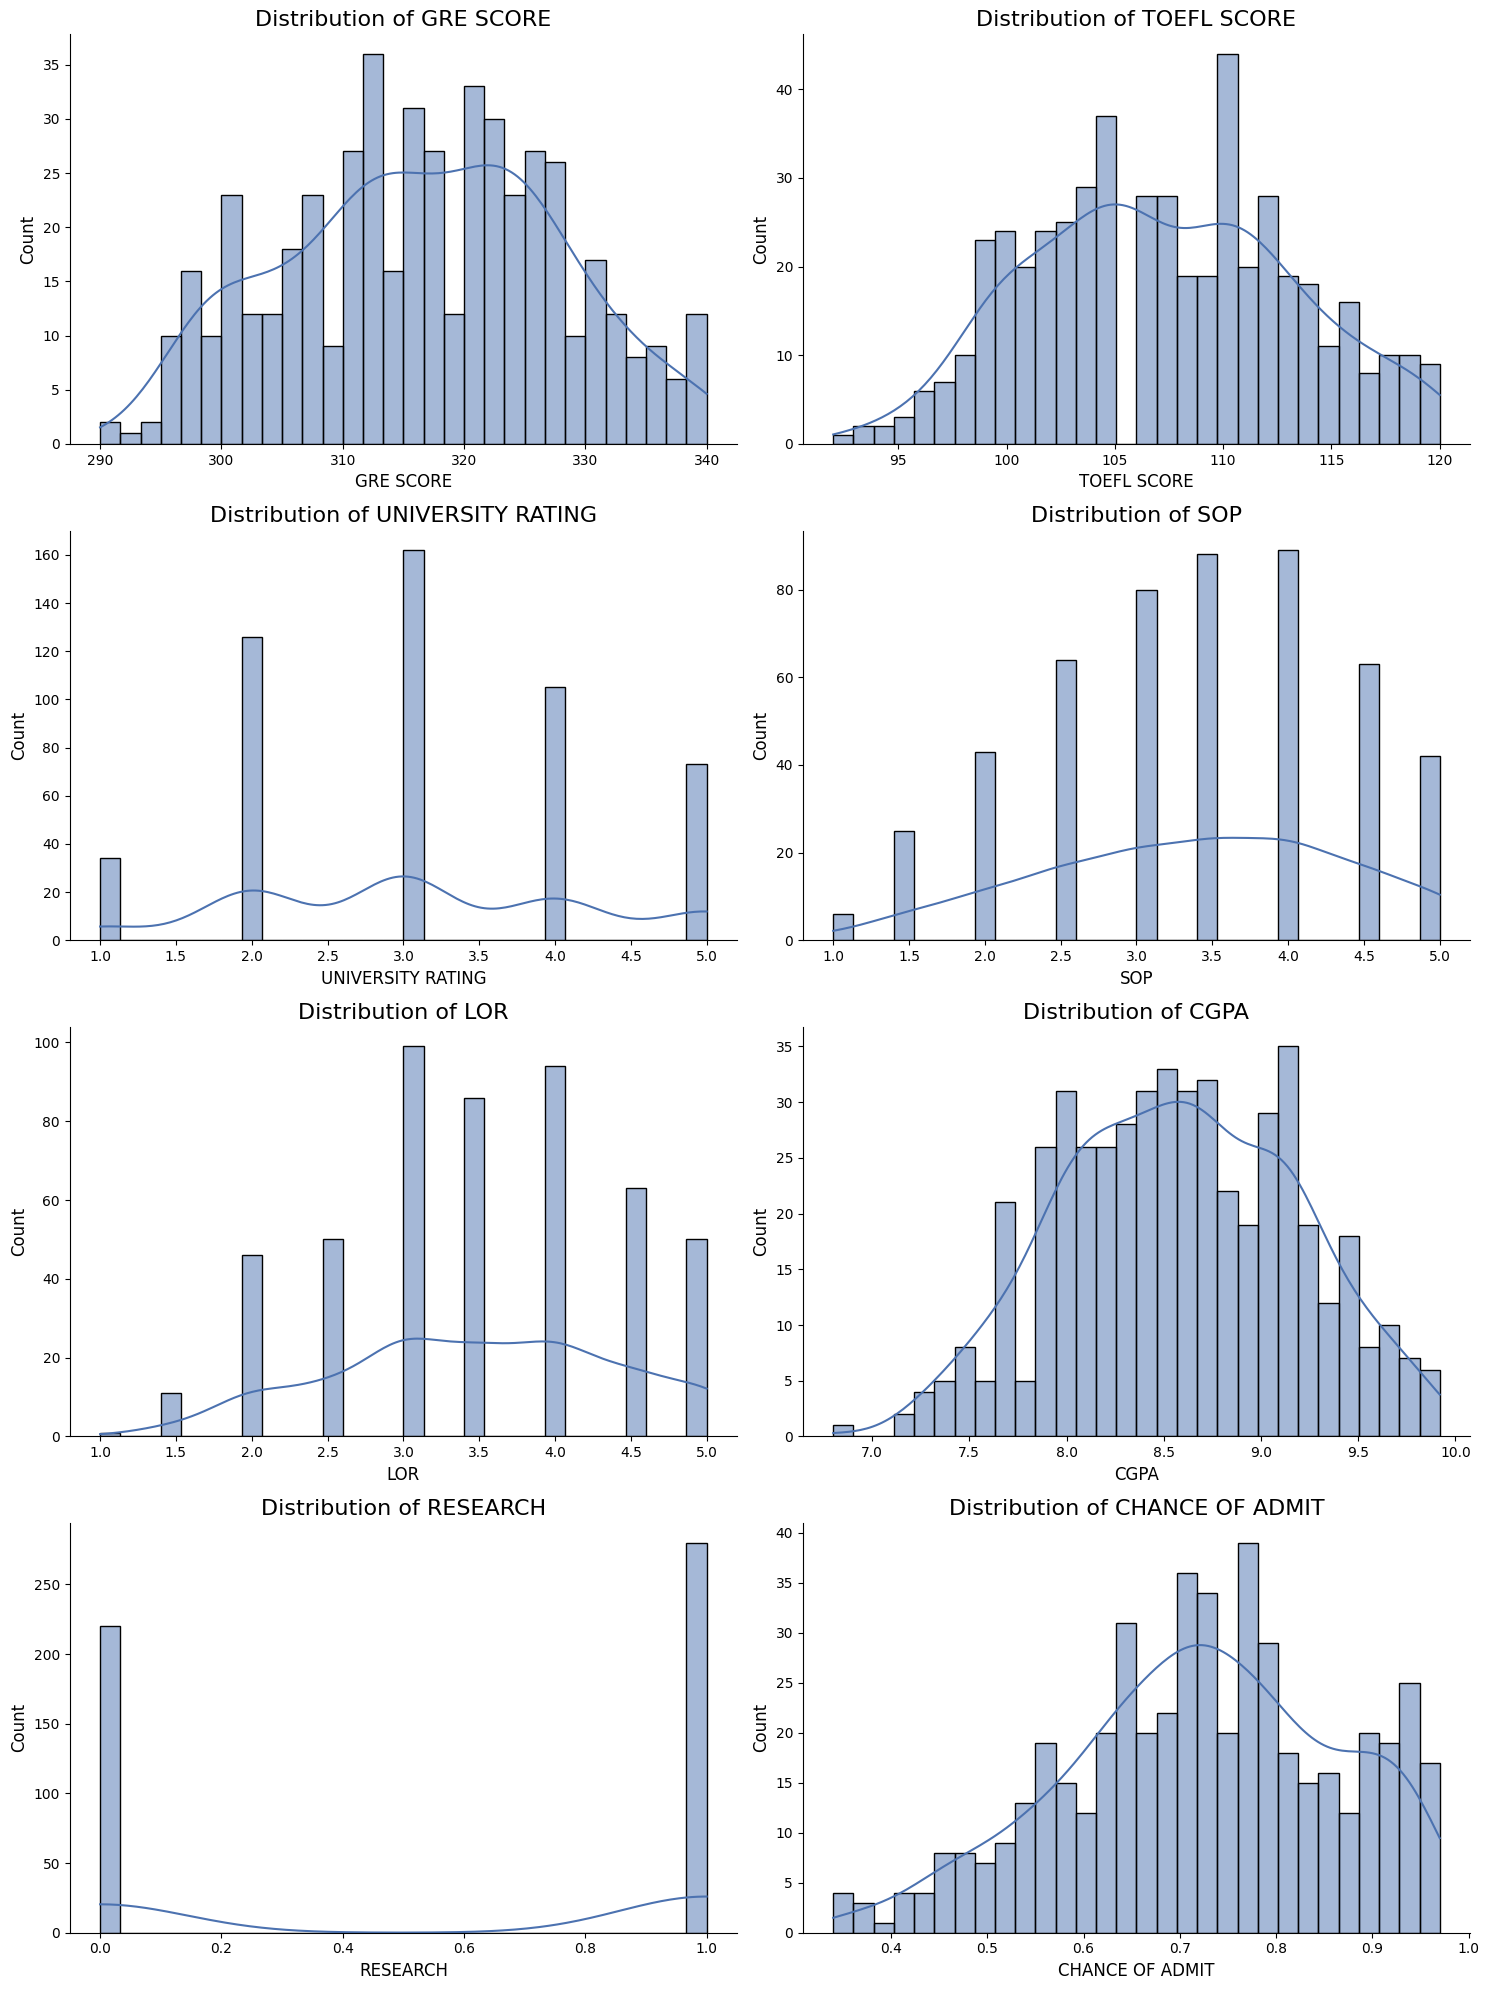

In [9]:
import seaborn as sns
import math

num_cols = 2
num_plots = len(df.columns)
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i])
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel(col.upper(), fontsize=12)
    axes[i].set_title(f'Distribution of {col.upper()}', fontsize=16)
    sns.despine(ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

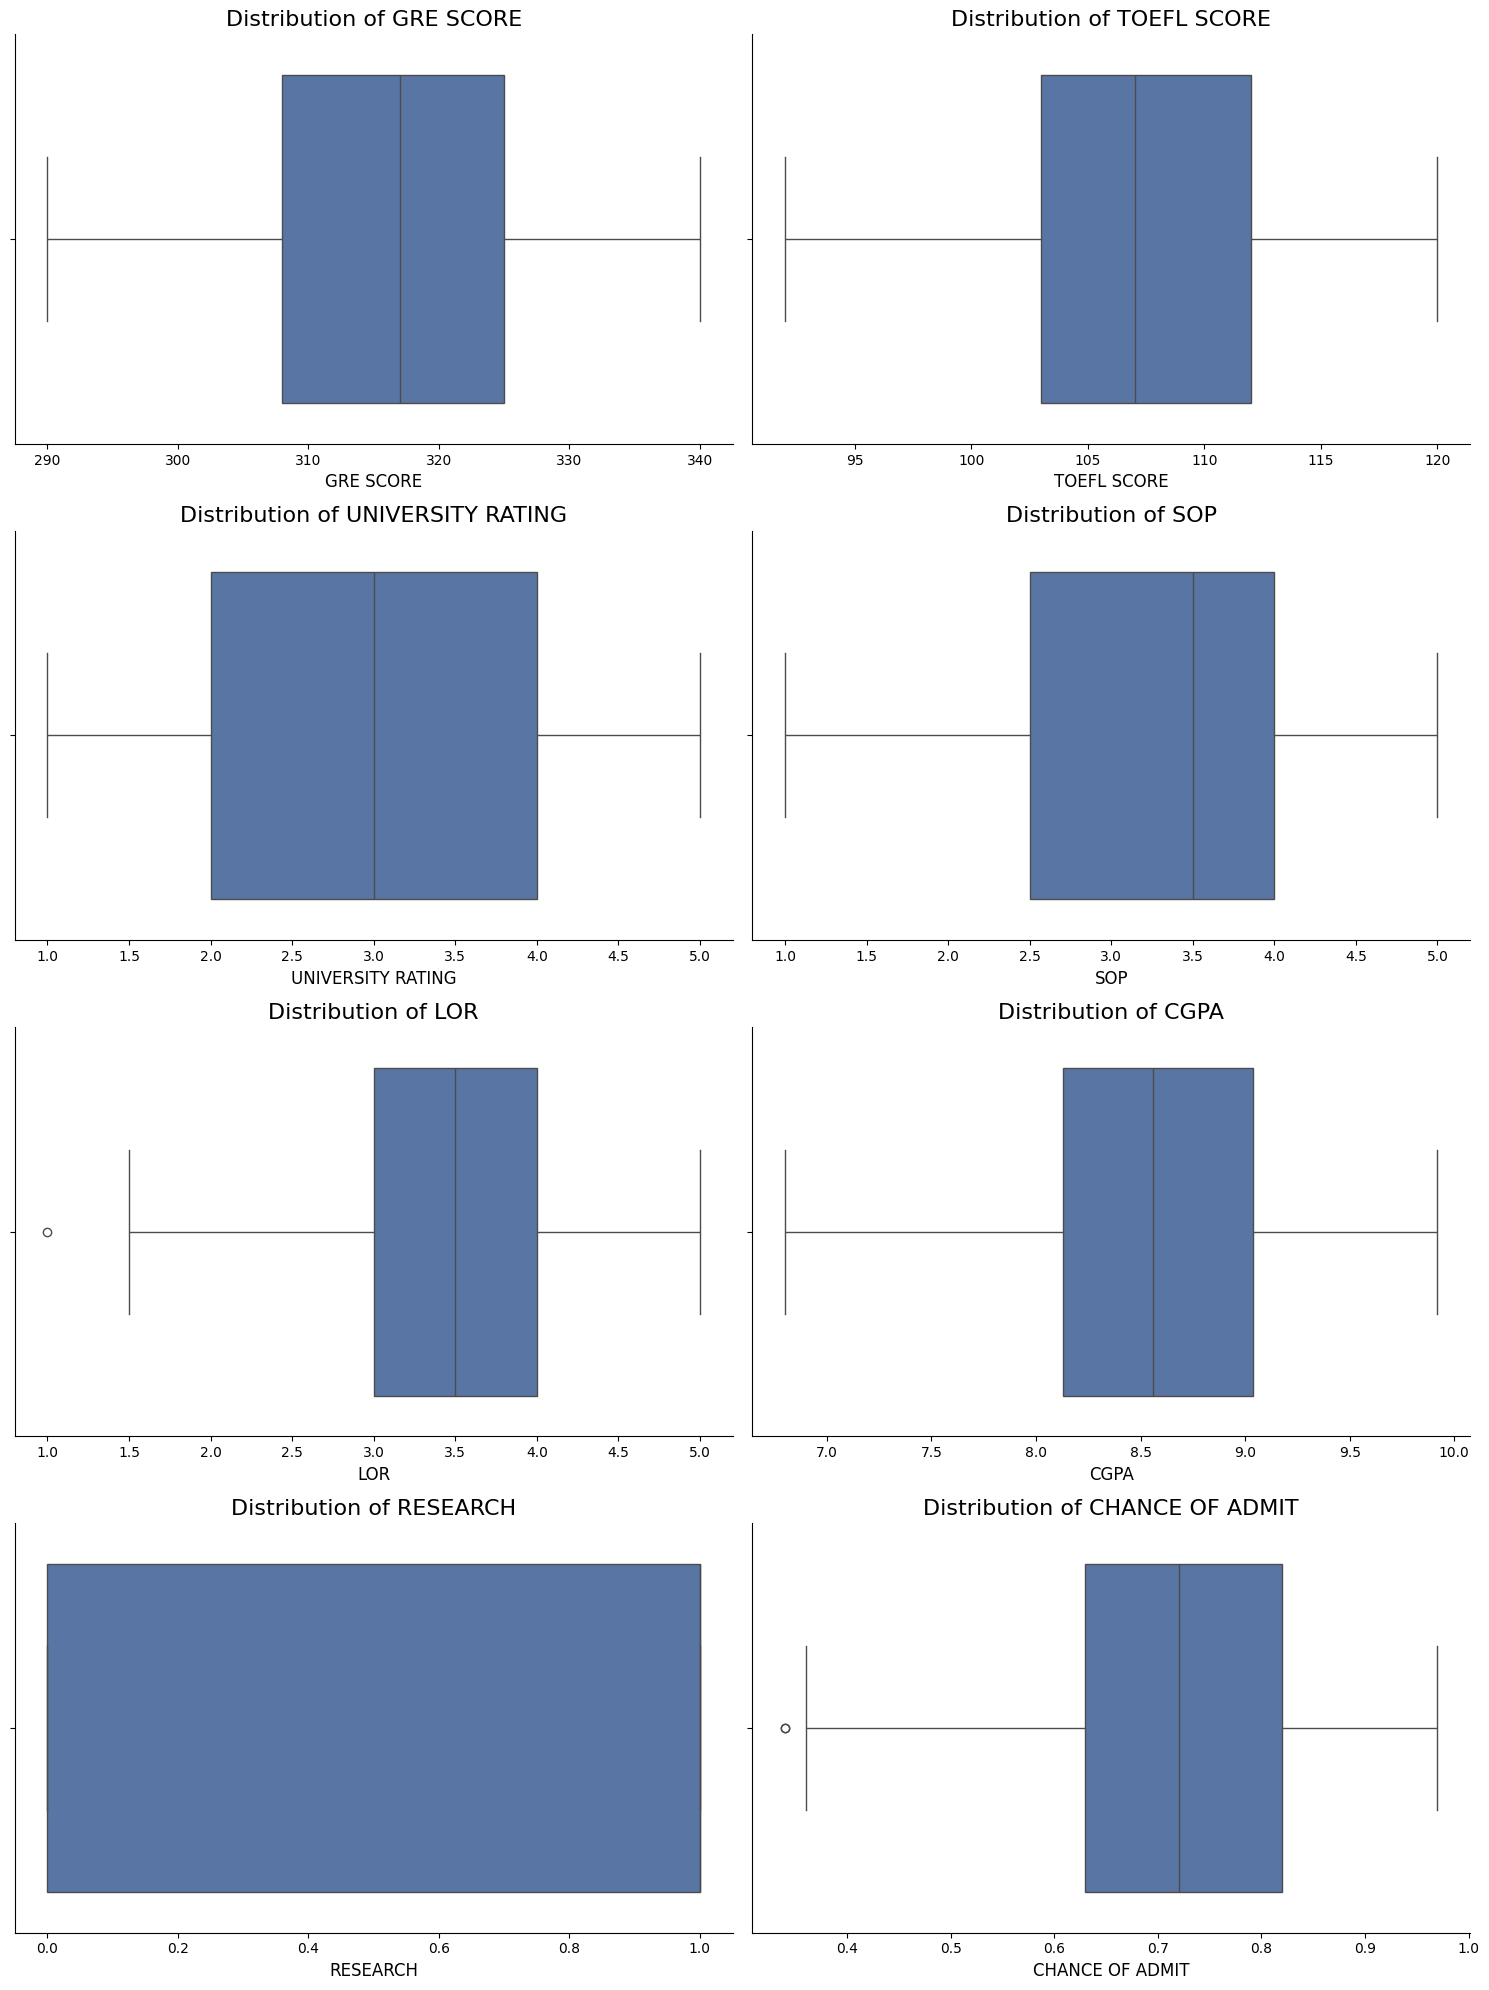

In [10]:
import seaborn as sns
import math

num_cols = 2
num_plots = len(df.columns)
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_xlabel(col.upper(), fontsize=12)
    axes[i].set_title(f'Distribution of {col.upper()}', fontsize=16)
    sns.despine(ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

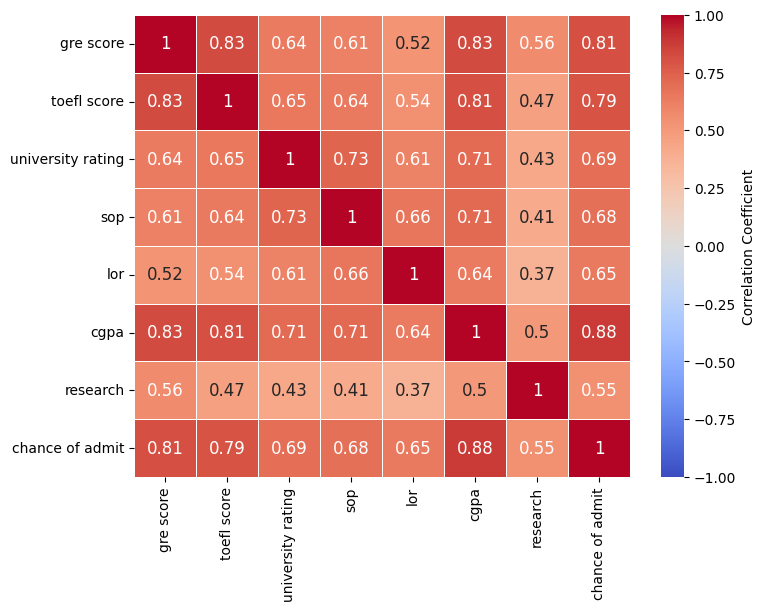

In [11]:
# correlation heatmap
import numpy as np

df_corr = df.corr()

plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(
  df_corr,
  annot=True,
  cmap='coolwarm',
  vmin=-1, vmax=1,
  linewidths=0.5,
  annot_kws={"size": 12},
  cbar_kws={'label': 'Correlation Coefficient'}
)

plt.show()

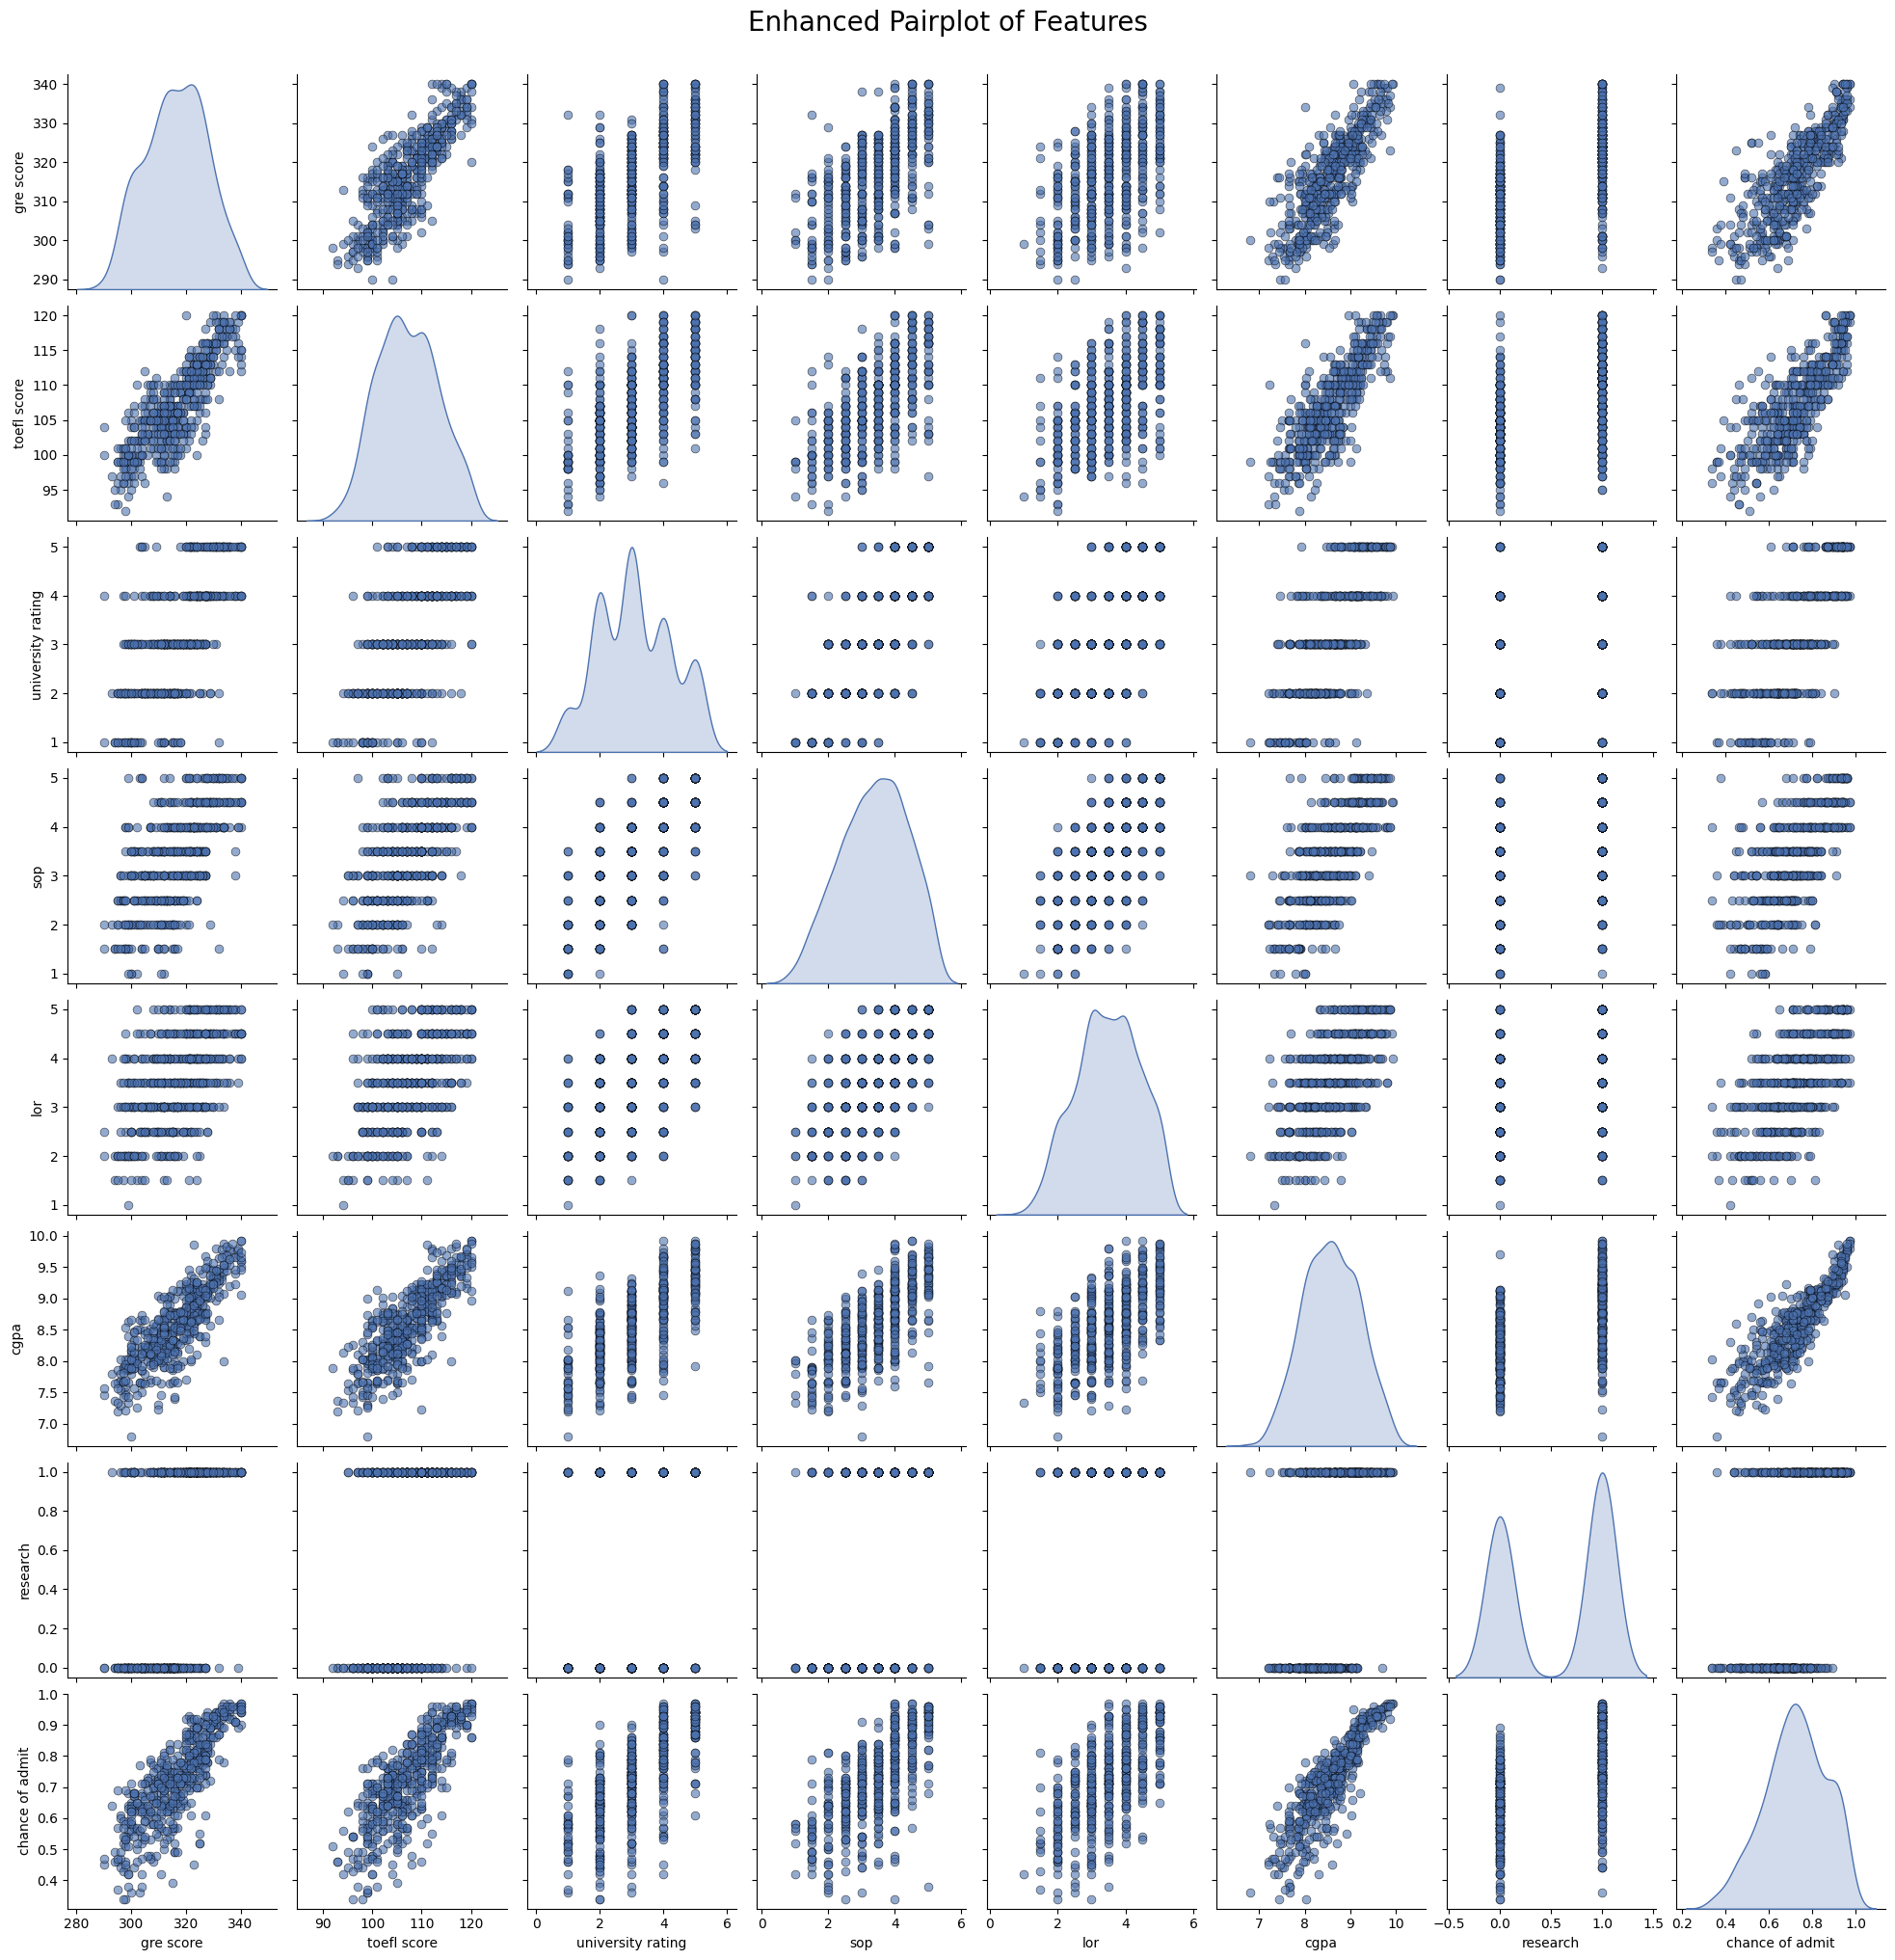

In [12]:
# pairplot for bivariant analysis
sns.pairplot(
  df,
  diag_kind='kde',
  kind='scatter',
  plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
  diag_kws={'fill': True}
)

plt.suptitle('Enhanced Pairplot of Features', y=1.02, fontsize=20)
plt.show()

# Statistical Test

In [14]:
# anova test for university rating
from scipy.stats import f_oneway

group1 = df[df['university rating'] == 1]['chance of admit']
group2 = df[df['university rating'] == 2]['chance of admit']
group3 = df[df['university rating'] == 3]['chance of admit']
group4 = df[df['university rating'] == 4]['chance of admit']
group5 = df[df['university rating'] == 5]['chance of admit']

f_stat, p_value_anova = f_oneway(group1, group2, group3, group4, group5)
f_stat, p_value_anova

(114.00804341400004, 7.753395328023128e-69)

In [15]:
# correlation test for continous variable
from scipy.stats import pearsonr

corr_gre, p_value_gre = pearsonr(df['gre score'], df['chance of admit'])
corr_cgpa, p_value_cgpa = pearsonr(df['cgpa'], df['chance of admit'])

corr_gre, p_value_gre

(0.8103506354632598, 1.0884036862479007e-117)

In [16]:
corr_cgpa, p_value_cgpa

(0.8824125749045744, 3.3965448587112374e-165)

In [18]:
# chi-square test for research and university rating
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['research'], df['university rating'])

chi_stat, p_value_chi, dof, expected = chi2_contingency(contingency_table)
chi_stat, p_value_chi

(96.90000948490646, 4.4936229585994394e-20)

# Preprocessing

In [20]:
# one-hot-encoding for categorical features
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['university rating', 'sop', 'lor', 'research']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_series = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_series, columns=encoder.get_feature_names_out(categorical_columns))

df_new = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)
df_new

,gre score,toefl score,cgpa,chance of admit,university rating_2,university rating_3,university rating_4,university rating_5,sop_1.5,sop_2.0,sop_2.5,sop_3.0,sop_3.5,sop_4.0,sop_4.5,sop_5.0,lor_1.5,lor_2.0,lor_2.5,lor_3.0,lor_3.5,lor_4.0,lor_4.5,lor_5.0,research_1
0,337,118,9.65,0.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,324,107,8.87,0.76,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,316,104,8.00,0.72,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,322,110,8.67,0.80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,314,103,8.21,0.65,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,332,108,9.02,0.87,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
496,337,117,9.87,0.96,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
497,330,120,9.56,0.93,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
498,312,103,8.43,0.73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# data splitting
from sklearn.model_selection import train_test_split

x = df_new.drop(columns=['chance of admit'], errors='ignore')
y = df_new['chance of admit']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((400, 24), (100, 24), (400,), (100,))

In [25]:
# standardization using min-max-scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Modelling

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


models = {
    'linear regression': LinearRegression(),
    'decision tree': DecisionTreeRegressor(random_state=42),
    'random forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'support vector machine': SVR(kernel='rbf'),
    'gradient boosting': GradientBoostingRegressor(random_state=42)
}

result = {}

for name, model in models.items():
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)

  cv_score = cross_val_score(model, xtrain, ytrain, cv=5, scoring='r2').mean()

  mae = mean_absolute_error(ytest, ypred)
  mse = mean_squared_error(ytest, ypred)
  r2 = r2_score(ytest, ypred)

  result[name] = {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'Cross-Validation R2': cv_score
  }

  if hasattr(model, 'feature_importances_'):
    importance = model.feature_importances_
    feature_importance = pd.Series(importance, index=x.columns).sort_values(ascending=False)
    print(f"\nFeature Importance for {name}:\n", feature_importance)

  if hasattr(model, 'coef_'):
    importance = model.coef_
    feature_importance = pd.Series(importance, index=x.columns).sort_values(ascending=False)
    print(f"\nFeature Importance for {name}:\n", feature_importance)

result_df = pd.DataFrame(result).T


Feature Importance for linear regression:
 cgpa                   0.112482
lor_5.0                0.034326
research_1             0.024615
sop_2.5                0.018919
lor_4.5                0.018131
lor_4.0                0.017529
sop_5.0                0.013198
sop_4.5                0.012251
sop_4.0                0.011404
sop_3.0                0.009877
sop_3.5                0.005293
lor_2.5                0.004731
lor_3.5                0.004086
toefl score            0.003057
gre score              0.002377
sop_2.0               -0.002960
university rating_5   -0.004063
lor_3.0               -0.005505
sop_1.5               -0.011267
university rating_3   -0.018702
lor_2.0               -0.020113
university rating_2   -0.020162
university rating_4   -0.020223
lor_1.5               -0.053185
dtype: float64

Feature Importance for decision tree:
 cgpa                   0.800657
gre score              0.089173
toefl score            0.029163
lor_2.0                0.013270
resea

In [32]:
result_df

,MAE,MSE,R2,Cross-Validation R2
linear regression,0.043240,0.003756,0.816311,0.789704
decision tree,0.064000,0.008362,0.591100,0.596425
random forest,0.046110,0.004398,0.784935,0.777961
support vector machine,0.067009,0.007431,0.636647,0.652931
gradient boosting,0.044973,0.004331,0.788209,0.762526
